In [3]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

import numpy as np
import math
import pylab

%matplotlib inline
pylab.rcParams['figure.figsize'] = (10, 10)
import matplotlib.pyplot as plt

In [4]:
sess = None
def ResetSession():
    tf.reset_default_graph()
    global sess
    if sess is not None: sess.close()
    sess = tf.InteractiveSession()

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
There are 55000 images in the training set, 5000 in the validation set and 10000 in the test set

These are the label vectors of the first 10 images in the mnist training set: 
 [[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]] 

These are the values of those labels:  [0, 4, 5, 6, 9, 9, 3, 1, 3, 6] 

And these are the rendered images: 




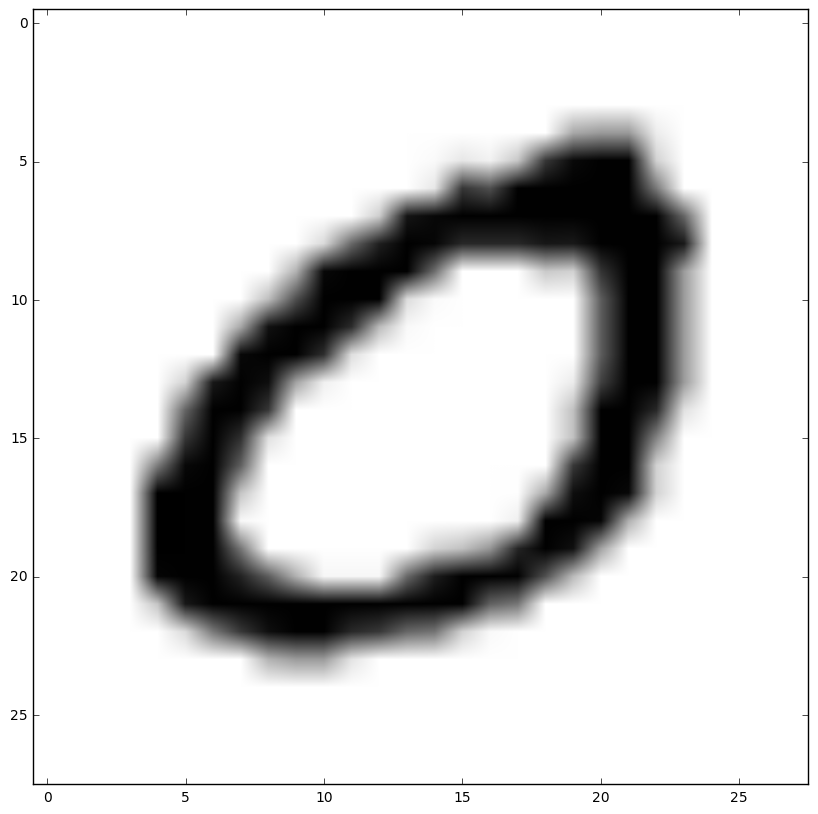

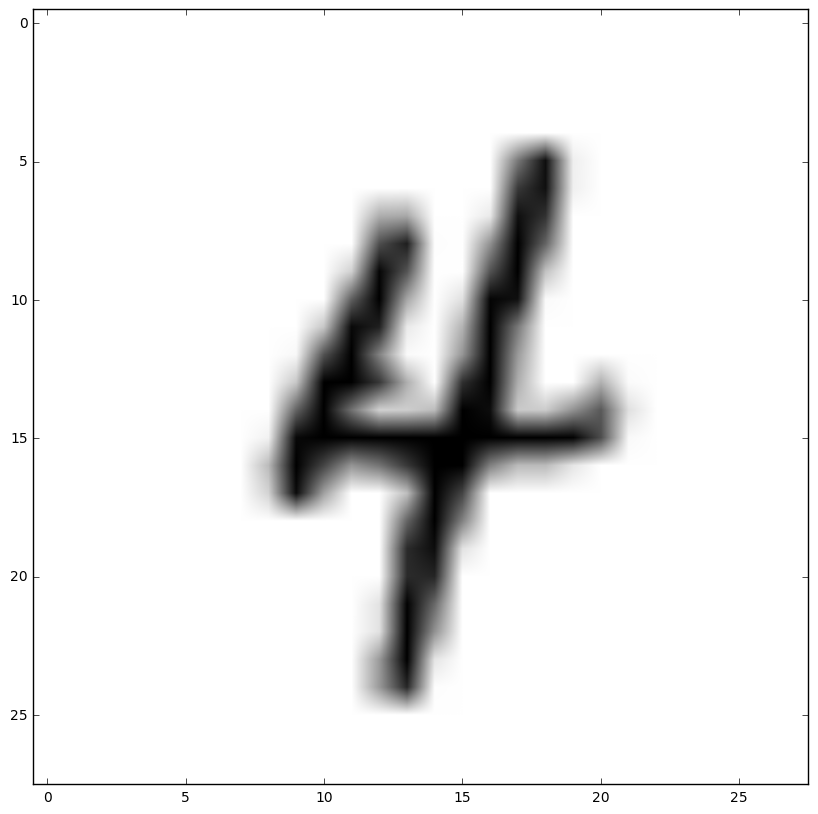

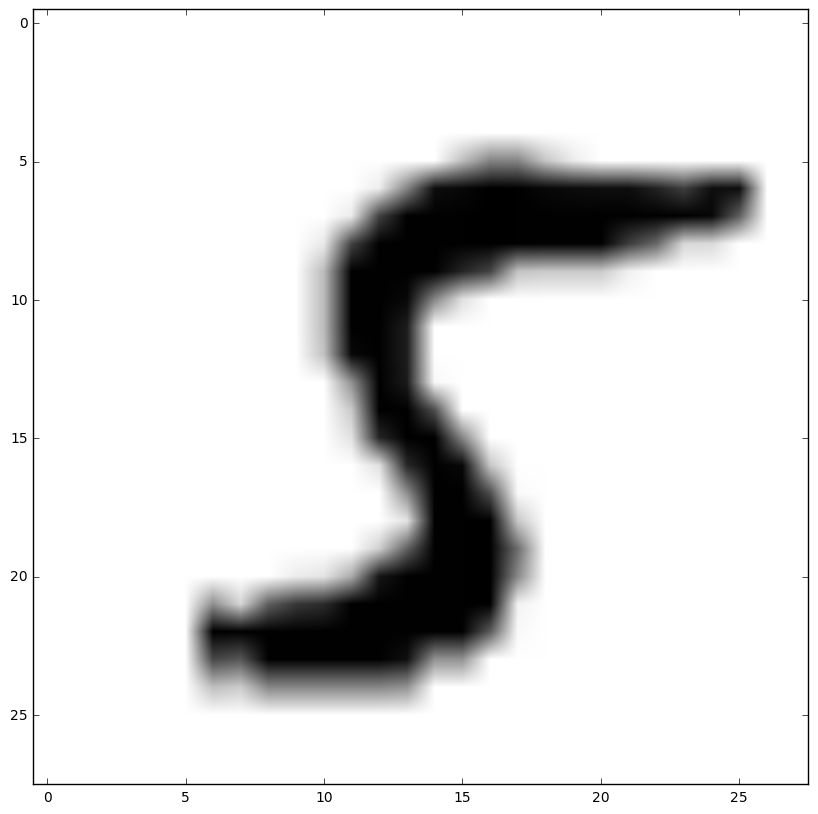

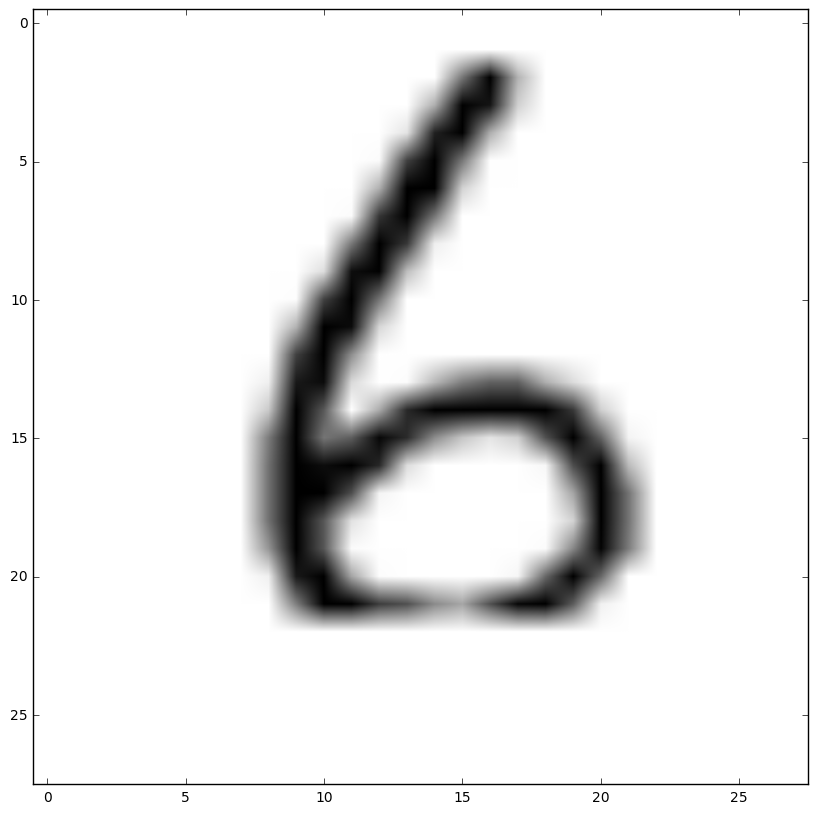

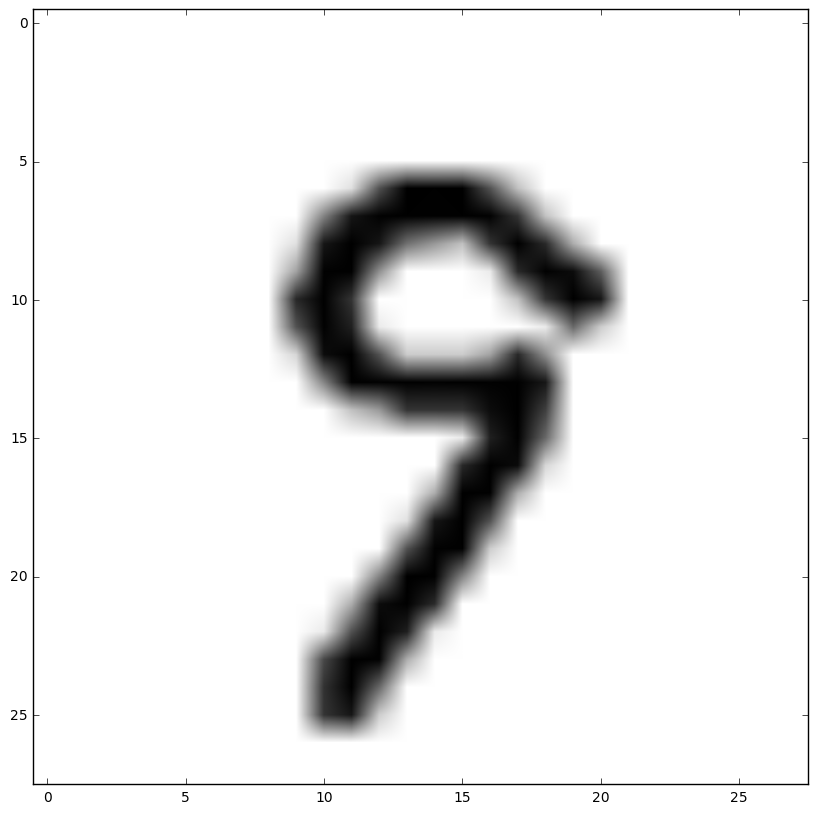

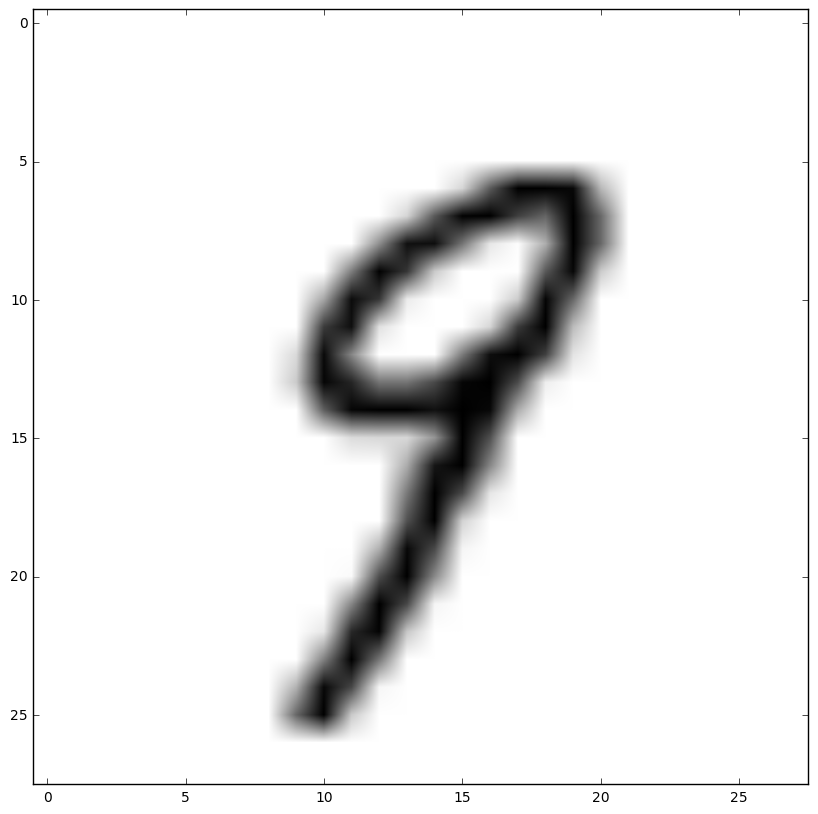

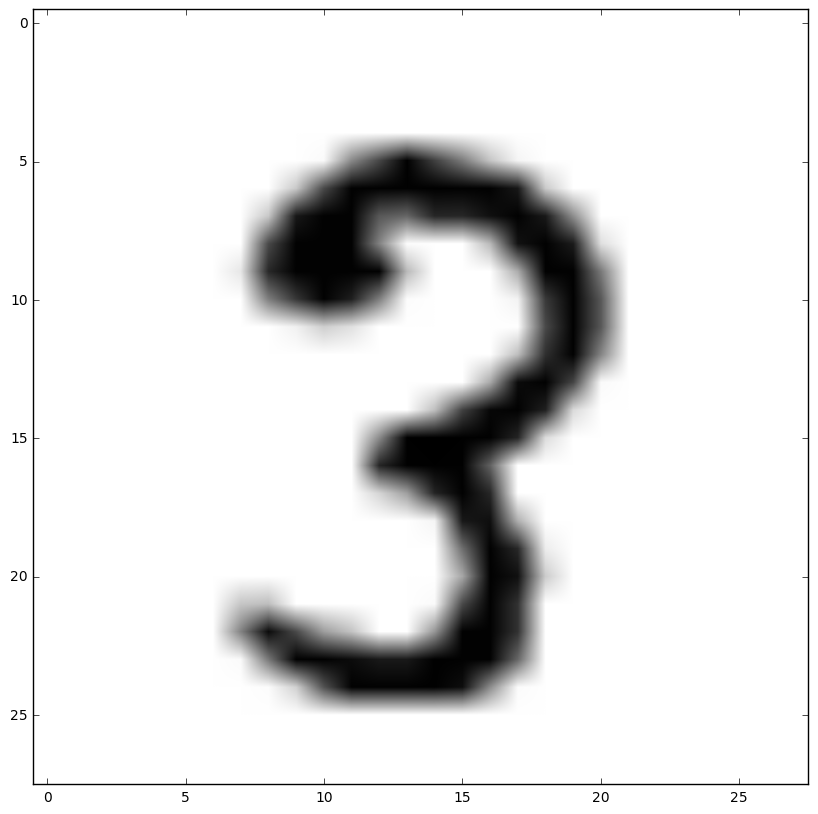

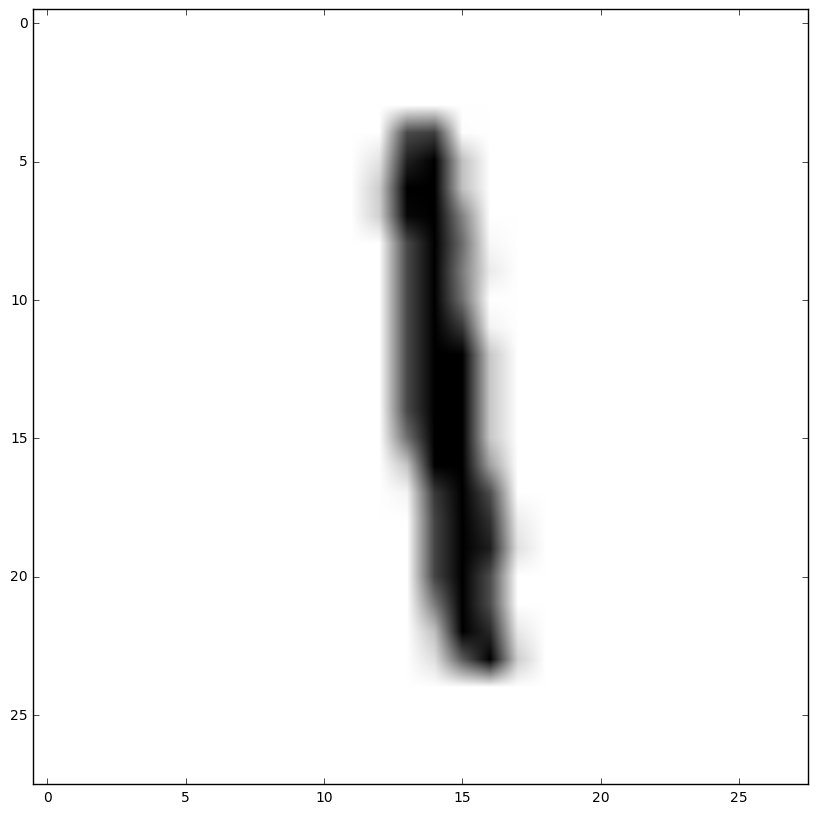

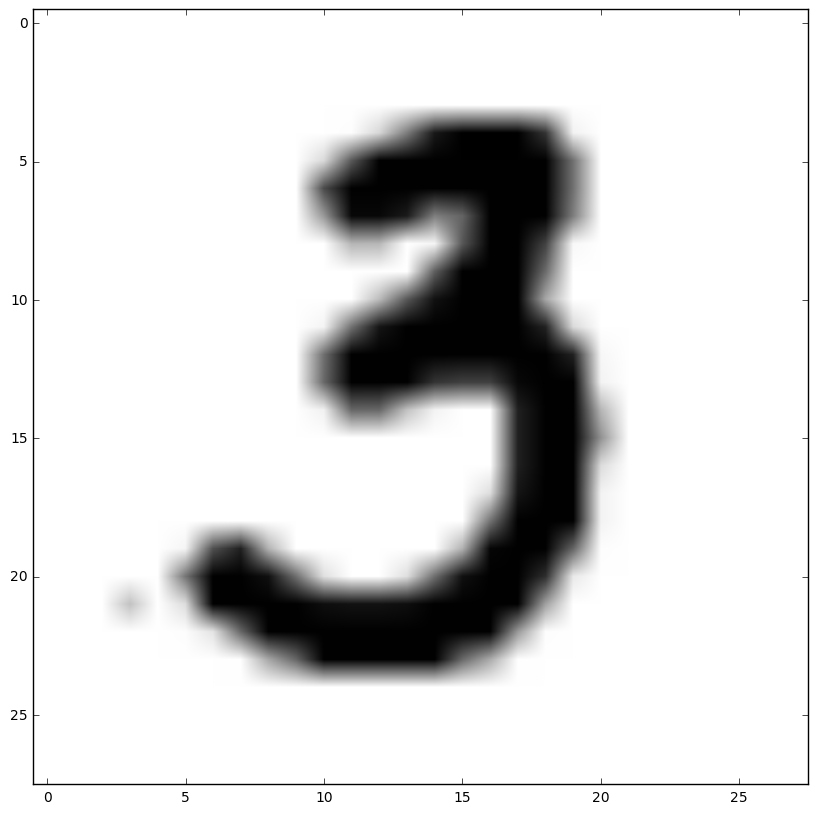

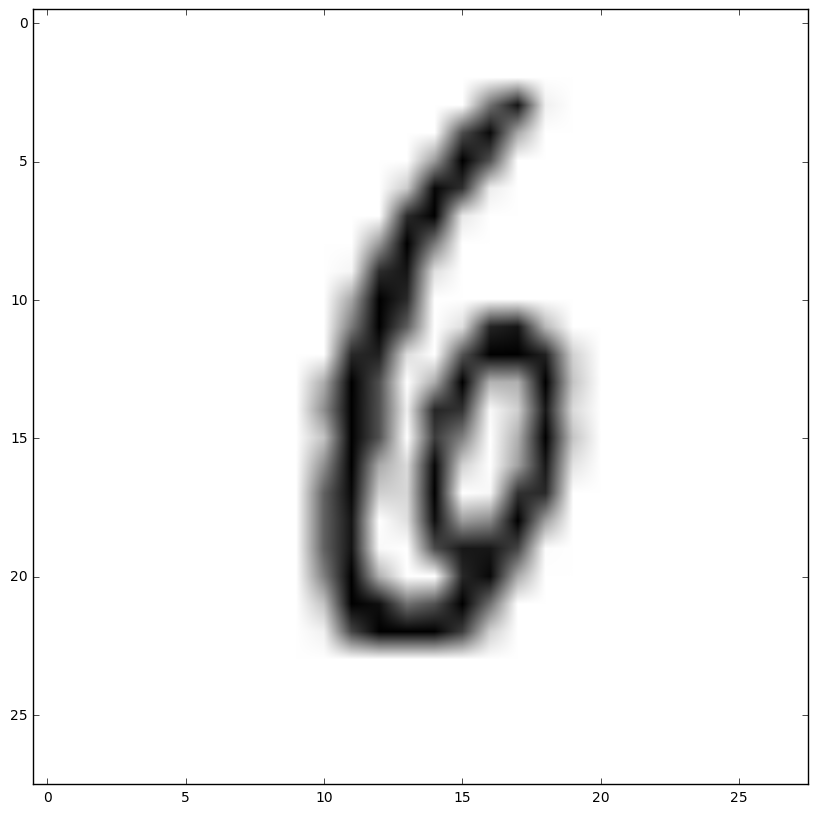

Instructions for updating:
Please switch to tf.summary.FileWriter. The interface and behavior is the same; this is just a rename.
Instructions for updating:
Use `tf.global_variables_initializer` instead.
Accuracy is 0.924300


In [69]:
mist = input_data.read_data_sets("/tmp/data", one_hot=True)

print(
    "There are %s images in the training set, %s in the validation set and %s in the test set\n" % 
    (
        len(mnist.train.images), 
      len(mnist.validation.images), 
      len(mnist.test.images)
        )
     )
print("These are the label vectors of the first 10 images in the mnist training set: \n", mnist.train.labels[:10], "\n")
print("These are the values of those labels: ", [np.argmax(r) for r in mnist.train.labels[:10]], "\n")
print("And these are the rendered images: \n\n")
for idx in range(10):
    plt.imshow(mnist.train.images[idx].reshape((28,28)), cmap=plt.cm.gray_r)
    plt.show()

ResetSession()

NUM_CLASSES = 10
NUM_PIXELS = 28*28
TRAIN_STEPS = 10000
BATCH_SIZE = 100
LEARNING_RATE = 0.5


x = tf.placeholder(dtype = tf.float32, shape=[None, NUM_PIXELS], name = "pixels")
y_ = tf.placeholder(dtype = tf.float32, shape = [None, NUM_CLASSES], name = "labels")

W = tf.Variable(tf.zeros([NUM_PIXELS, NUM_CLASSES]), name = "weights")
b = tf.Variable(tf.zeros([NUM_CLASSES]), name = "offset")
y = tf.add(tf.matmul(x, W),b)

summary_writer = tf.train.SummaryWriter("summaries/", graph=tf.get_default_graph())
summary_writer.close()

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y, y_))
train_step = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(loss)

sess.run(tf.initialize_all_variables())

for i in range(TRAIN_STEPS):
    batch_xs, batch_ys = mnist.train.next_batch(BATCH_SIZE)
    sess.run(train_step, feed_dict = {y_: batch_ys, x:batch_xs})
    
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

print("\n\nAccuracy is %f"%(sess.run(accuracy, feed_dict={y_:mnist.test.labels, x:mnist.test.images})))
    

prediction is  [7] , label is  7


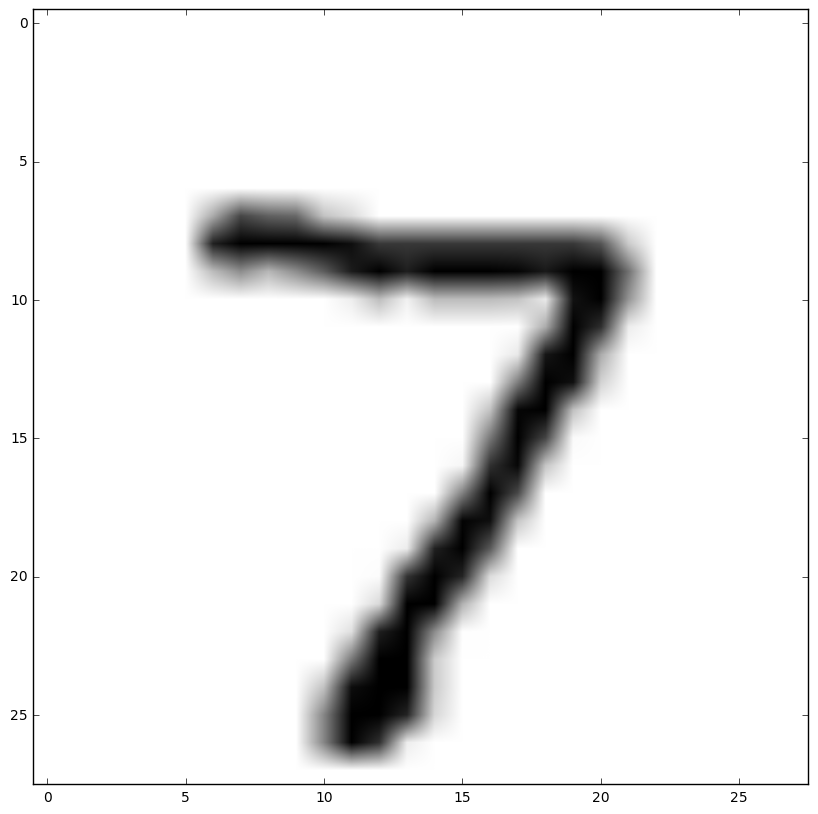

prediction is  [2] , label is  2


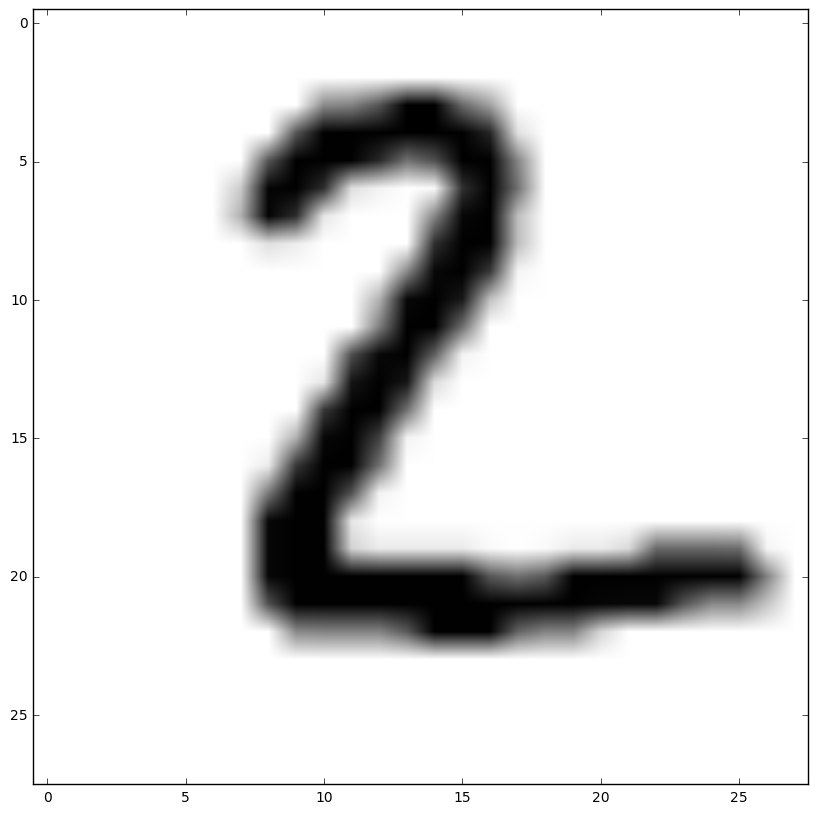

prediction is  [1] , label is  1


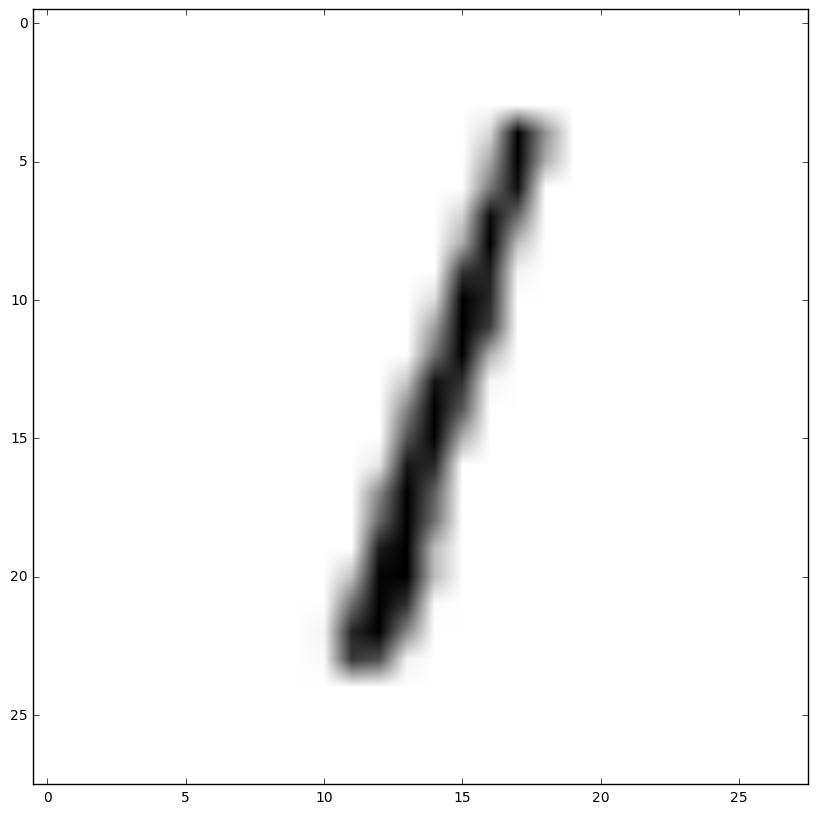

prediction is  [0] , label is  0


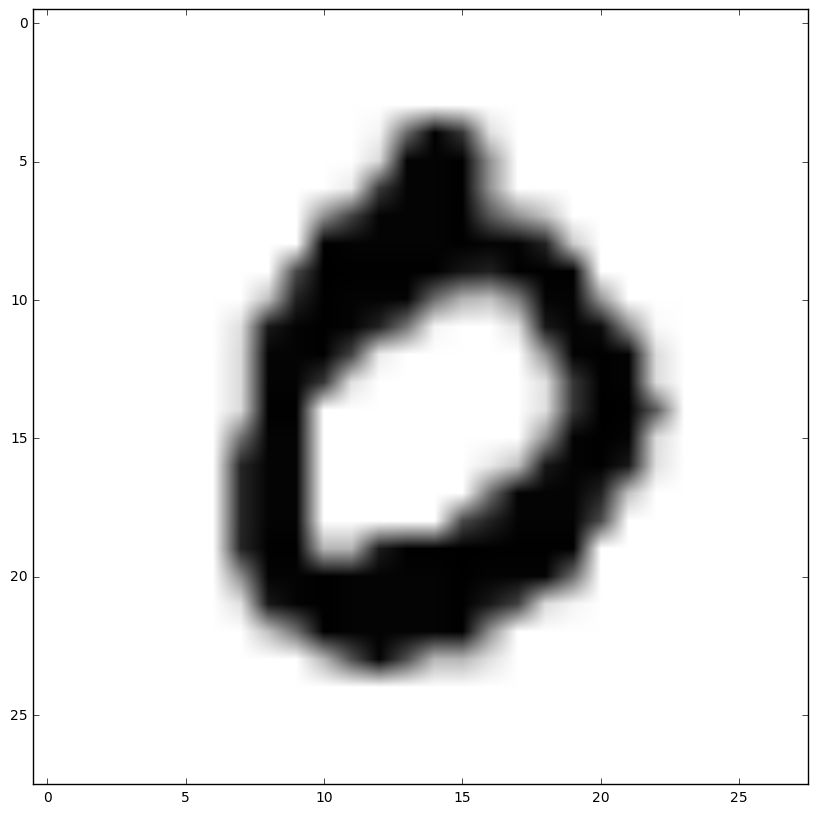

prediction is  [4] , label is  4


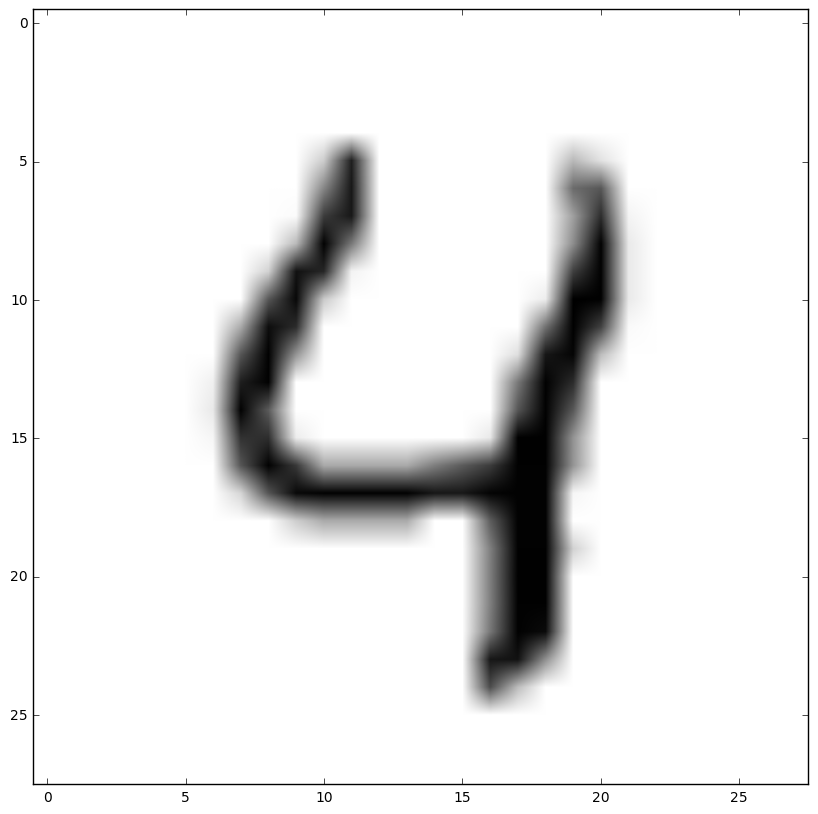

prediction is  [1] , label is  1


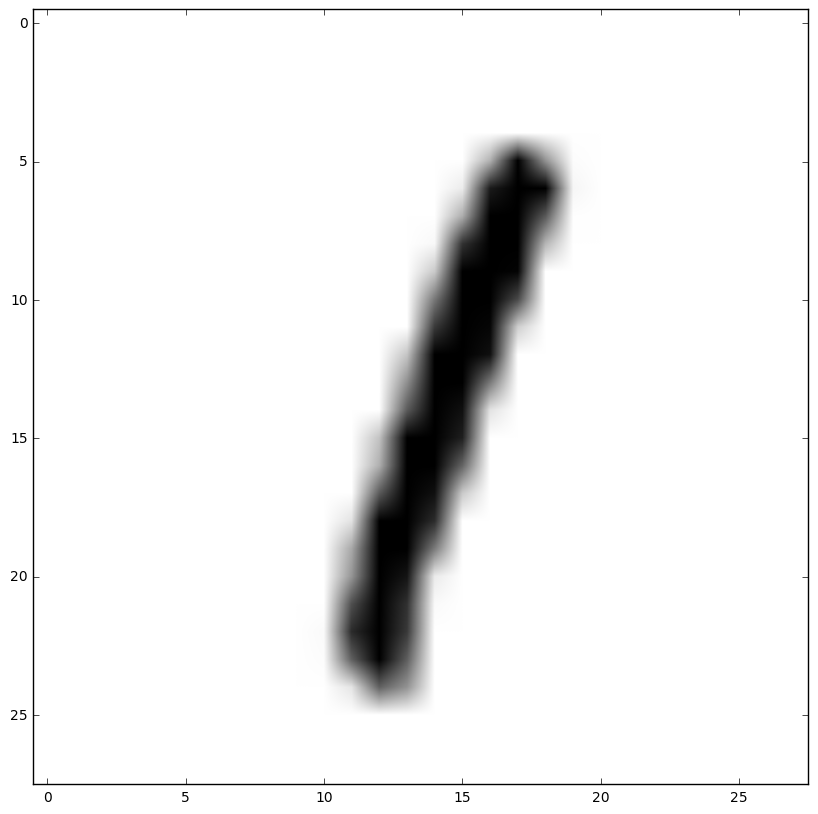

prediction is  [4] , label is  4


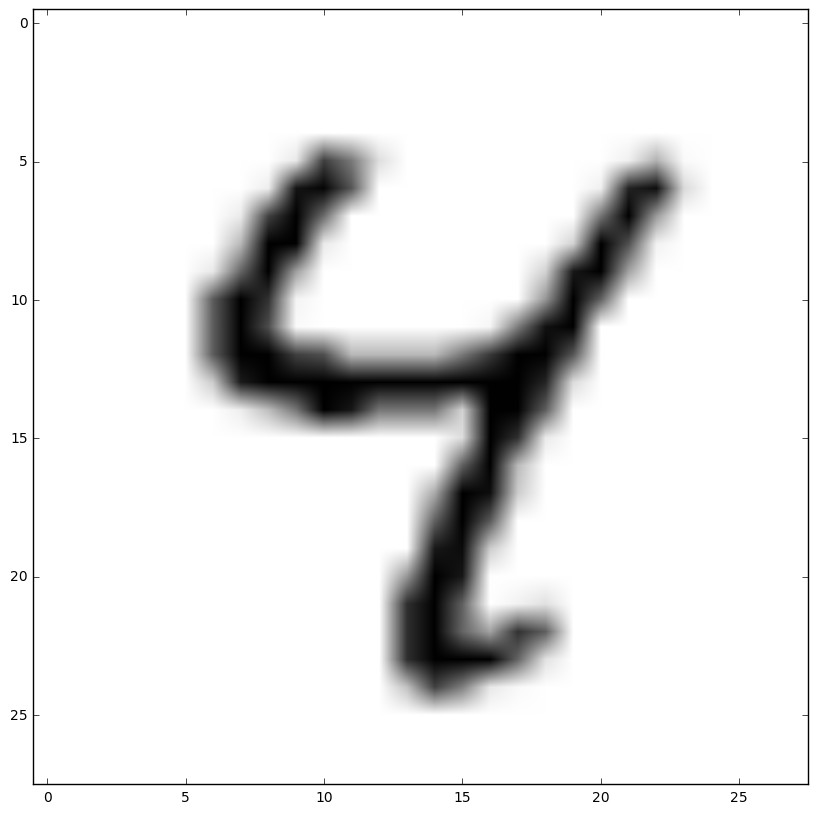

prediction is  [9] , label is  9


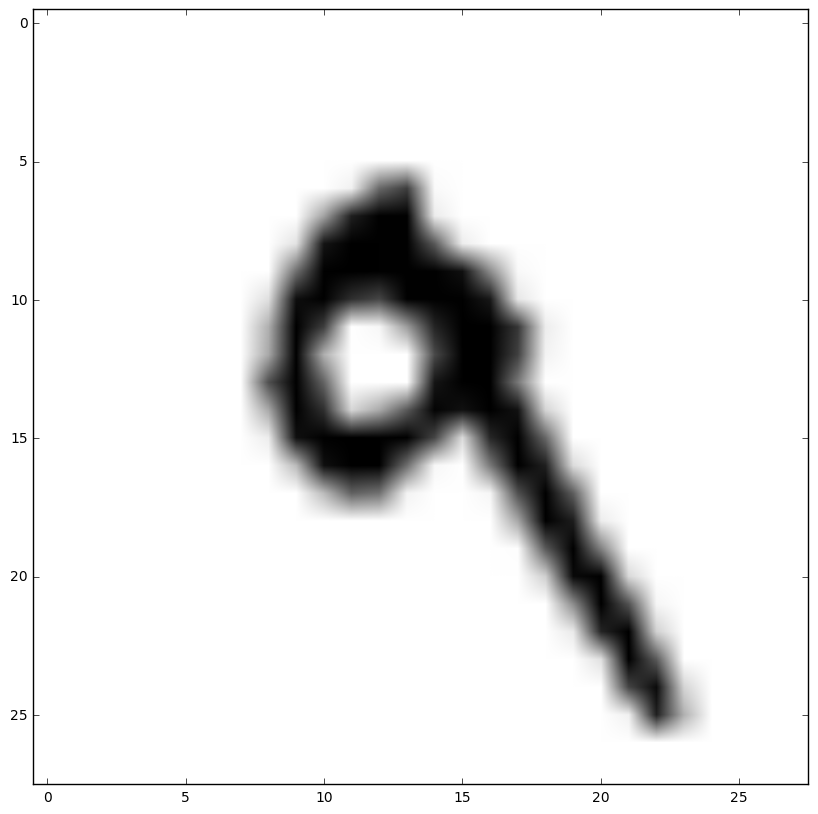

prediction is  [6] , label is  5


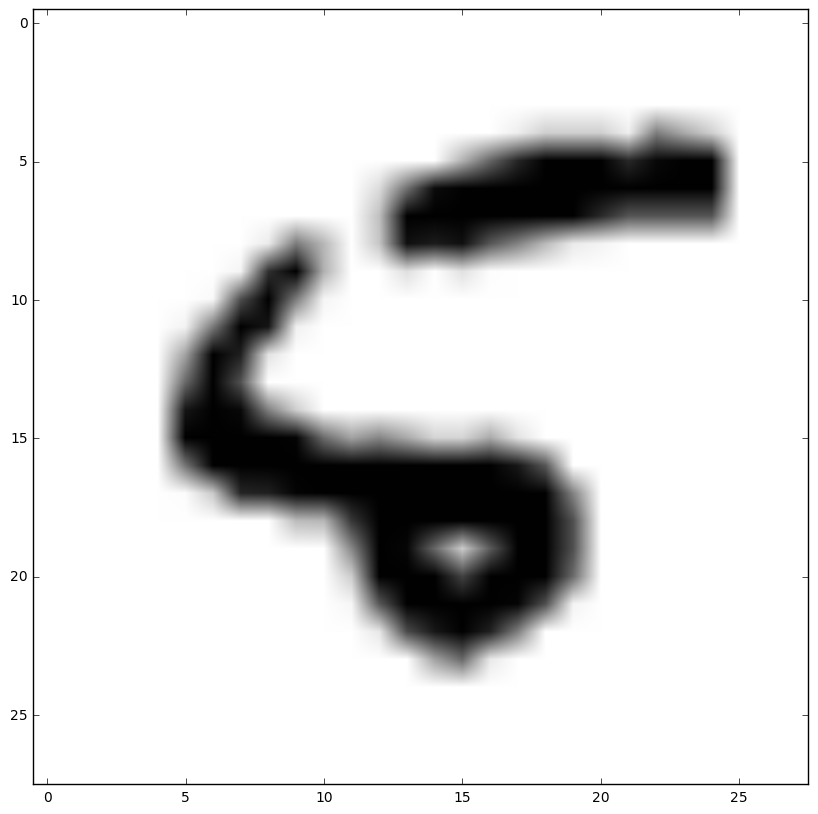

prediction is  [9] , label is  9


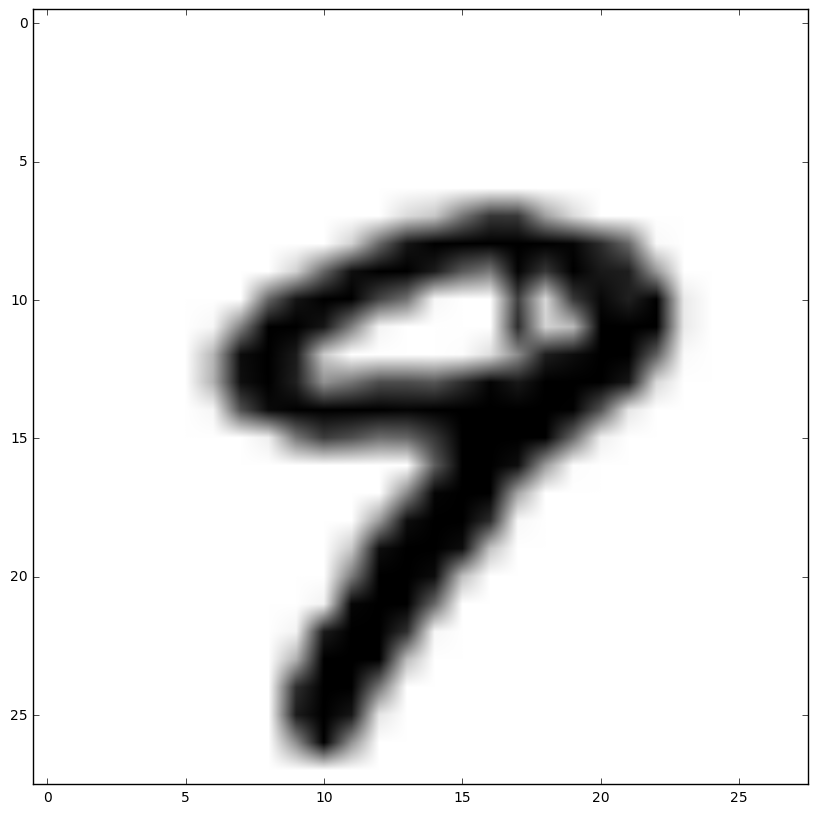

In [72]:
def predict_and_check(idx, fig):    
    x_in = mnist.test.images[idx]
    print("prediction is ", sess.run(tf.argmax(y, 1), feed_dict={x:x_in.reshape(1, 784)}), 
          ", label is ", np.argmax(mnist.test.labels[idx]))
    #print(sess.run(y, feed_dict={x:x_in.reshape(1, 784)}))
    #print("labels are ", mnist.test.labels[idx])
    #print("here's the actual image:")

    plt.imshow(mnist.test.images[idx].reshape((28,28)), cmap=plt.cm.gray_r)
    plt.show()
    
for idx in range(10):
    predict_and_check(idx, fig)

In [74]:
tf.nn.softmax_cross_entropy_with_logits??